# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.


**Purpose of the project**:

1. Preprocessing the dataset

2. Exploring and analyzing the plans from individual and groups of clients' behavior.

3. Implement a statistical test to inference the different between two plans.

4. Make a suggestion about two plans.


## Initialization

Import necessary libraries

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Load data

There are 5 tables

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
users = pd.read_csv("/datasets/megaline_users.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

There are 5 tables totally. 

The 'Users' table contains 500 users and their demography and plan information.

Three of tables are detailed data related to customer behavior, i.e. 'calls', 'messages' and 'internet'. To calculate the revenue, we might merge them into one table, but I will process them seperately at first.

The "plans" table is a reference, it doesn't need to process right now.

The former 4 tables have some explicit missing values, some columns need to be transfrom to other data type, and some columns need to be addressed customarily. The specific column has been list into the table below.

**Initial understanding of each table**

| table | size | explicit missing | need to change datatype | Initial understanding |
| --    | --   | --      | --                    | --                      |
| users  | (500,7)|'churn_date'    |1. 'reg_date' to timestamp;  | 1. Missing value -> category.|
|  | |    | 2.'city','plan','churn_date' to categoty  | 2. Address user names, probably don't need it|
| calls  | (137735,4)|--   |1. 'call_date' to timestamp;  | 1. "id" should be processed to a better format.|
|   | |--   | | 2. 'Duration' should be rounded to integer.|
| messages  |(76051, 3) |--   | same to 'calls' table| Same to 'calls' table|
| internet  |(104825, 4) |--   | same to 'calls' table| Same to 'calls' table|

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The 'plans' table is the description of two plans. It has two rows to show detailed information of two plans. It's no need to fix anything about this table.

## Fix data

I'll fix each table in the next sections

## Enrich data

I'll enrich each table in the next sections.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [7]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,NaN
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaN
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaN


**General point of view for 'user' table**

The 'user' table has 500 entries and 7 feature columns. The columns of 'user_id' and 'age' are integer datatype, others are string data type.

The ranges of 'user_id' is [1000, 1499] and 'age' is [18, 75]

There is one column, 'churn_date', has many missing values. The missing values are users who still keep staying in the plan. I'll change this column into categorical, and make 0 represent missing values and let 1 to represent left user. 

There are three columns, 'age', 'reg_date' and 'plan', need to be transformed data types.

The columns of user names seem useless, I will drop it.

The column of 'city' need to be addressed after inspection.

### Fix Data

#### Missing data: churn_date

In [8]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [9]:
users['churn_date'].value_counts()

2018-12-18    3
2018-12-19    2
2018-12-31    2
2018-11-14    2
2018-12-26    1
2018-09-01    1
2018-12-10    1
2018-07-31    1
2018-10-13    1
2018-11-24    1
2018-11-16    1
2018-09-07    1
2018-09-18    1
2018-11-11    1
2018-10-03    1
2018-11-18    1
2018-08-19    1
2018-08-16    1
2018-11-21    1
2018-11-30    1
2018-12-12    1
2018-10-07    1
2018-10-22    1
2018-12-15    1
2018-09-17    1
2018-11-29    1
2018-12-30    1
2018-12-22    1
2018-12-27    1
Name: churn_date, dtype: int64

'Churn_date' has 34 scattered date strings. 

I decide to leave it for a moment and right now I'll create a new column 'churned' to indicate whether this user has churned. 1 - churned, 0 - still stay in plan

In [10]:
users["churned"] = (~users['churn_date'].isna()).fillna(0).astype(int)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0


#### Data Type: 'reg_date'

Let's change the data type of 'reg_date' and 'churn_date' from string to datestamp, then check the time span of 'churn_date'.

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d", errors='coerce')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0


In [12]:
print(f"The time span of registration is from {users['reg_date'].min()} to {users['reg_date'].max()}")

The time span of registration is from 2018-01-01 00:00:00 to 2018-12-31 00:00:00


In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d", errors='coerce')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,0


In [14]:
print(f"The time span of churn is from {users['churn_date'].min()} to {users['churn_date'].max()}")

The time span of churn is from 2018-07-31 00:00:00 to 2018-12-31 00:00:00


We can see 34 churned customer left from plan among 5 months, I will make a deeper analysis in "Enrich Data" session.

#### Transform data type: age, plan

We've already known that the age range is [18, 75], let's get a brief comprehension about the distribution of users by age.

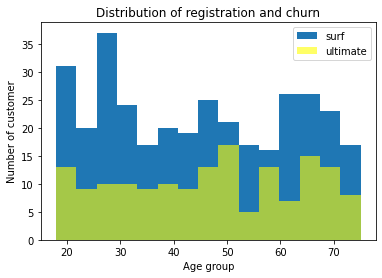

In [15]:
ax1 = users[users['plan'] == 'surf']['age'].plot(kind='hist',bins=15, label="surf")
ax2 = users[users['plan'] == 'ultimate']['age'].plot(kind='hist',bins=15, alpha=0.6, color='yellow', label='ultimate')

ax1.set_title("Distribution of registration and churn")
ax1.set_xlabel("Age group")
ax1.set_ylabel("Number of customer")
ax1.legend()
plt.show()

We can conclude that although whole distribution of users by age is relative even, there are some interesting facts:

* For users of 'surf' plan: 

    1. There is two peaks before 30 years old compared to users with same age in 'ultimate' plan, those users are more sensitive by the plan price.
    2. There is relative less distribution between 35 to 60, I assume these customers are less likely to change new plan, as well as users whose age are greater than 70.

* For users of 'ultimate' plan:

    1. There is one peak at the age of 45 - 50, these customers have the strongest purchasing ablitity, so they have will to use more expensive plan.

According to the customer behavior, I will split it into 4 stages:

| age | Defination | categorical code |
| --  | --         |    --            |
|[18, 25)| student |  0               |
|[25, 35)| young professionals | 1    |
|[35, 60]| experienced professionals|2|
|(60, 75]|retired |  3|

In [16]:
def age2cate(age):
    if (18 <= age) and (age < 25):
        return 0
    elif (25 <= age) and (age < 35):
        return 1
    elif (35 <= age) and (age <= 60):
        return 2
    else:
        return 3

users['age_group'] = users['age'].apply(age2cate)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned,age_group
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,2
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,0,2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,0,2
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,0,2


Now let's categorize the 'plan' column to 0 ('surf') and 1 ('ultimate').

In [17]:
users['plan_cate'] = users['plan'].apply(lambda x: 0 if x == 'surf' else 1)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned,age_group,plan_cate
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,2,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,1,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,0,2,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,0,2,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,0,2,0


#### Address the geographic data: 'city'

In [18]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Jacksonville, FL MSA                                1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Albany-Schenectady-Troy, NY MSA                     1
Name: city, Length: 73, dtype: int64

According to the task 1.15, we only care about users from 'NY-NJ_PA' area, so I'll distinguish them from other areas.

In [19]:
def city2cate(city_string):
    state = city_string.split(',')[-1]
    state = state.split(' ')[1]
    if state in ['NY-NJ-PA', 'NY', 'NJ']:
        return 1
    else:
        return 0

users['city_cate'] = users['city'].apply(city2cate)
#users.head()

In [20]:
cleaned_users = users[['user_id', 'reg_date', 'churned', 'age_group', 'plan_cate', 'city_cate']]
cleaned_users.head()

,user_id,reg_date,churned,age_group,plan_cate,city_cate
0,1000,2018-12-24,0,2,1,0
1,1001,2018-08-13,0,1,0,0
2,1002,2018-10-21,0,2,0,0
3,1003,2018-01-28,0,2,0,0
4,1004,2018-05-23,0,2,0,0


Now I've cleaned the 'users' table

### Enrich Data

#### Add a column 'month'

In [21]:
cleaned_users['month'] = cleaned_users['reg_date'].dt.month

/tmp/ipykernel_104/2126886195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_users['month'] = cleaned_users['reg_date'].dt.month


#### Check Distribution of registration and churn

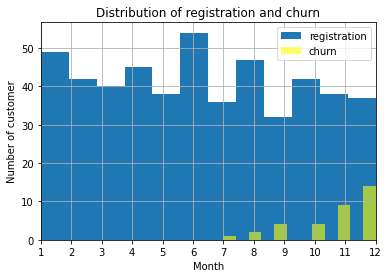

In [22]:
ax1 = users['reg_date'].dt.month.hist(bins=12, label='registration')
ax2 = users['churn_date'].dt.month.hist(bins=12, color='yellow', alpha=0.6, label='churn')

ax1.set_xlim([1, 12])
ax2.set_xlim([1, 12])

ax1.set_title("Distribution of registration and churn")
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of customer")
ax1.legend()
plt.show()

#### Distribution of registation date

Let's check out the distribution of registration between two plans

In [23]:
users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

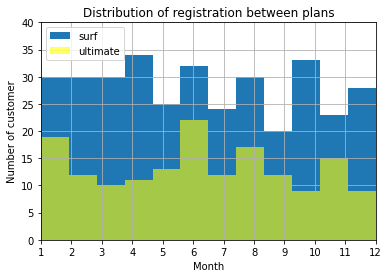

In [24]:
ax1 = users[users['plan'] == 'surf']['reg_date'].dt.month.hist(bins=12, label="surf")
ax2 = users[users['plan'] == 'ultimate']['reg_date'].dt.month.hist(bins=12, color='yellow', alpha=0.6, label='ultimate')

ax1.set_xlim([1, 12])
ax2.set_xlim([1, 12])
ax1.set_ylim([0, 40])
ax2.set_ylim([0, 40])

ax1.set_title("Distribution of registration between plans")
ax1.set_xticks(range(1,13))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of customer")
ax1.set_ylim()
ax1.legend(loc='upper left')
plt.show()

According to these two histograms above, we can conclude that:
1. Distribution of registration is relative even in month whatever the data is from all users or users from two plans. There are conditional more or less of registration in different months, e.g.the most registration is June thanks to the highest peak of new users from the 'ultimate' plan, then least registration is September due to the fewest registration from the 'surf' plan.

2. The ratio of two plans is almost one half: users of ultimate / users of surf = 0.48

3. The churn is a small proportion (6.8%), and all churns are in last 5 months. But the trend is increasing.

#### Duration of churn customers

/tmp/ipykernel_104/542970450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned["duration(month)"] = (churned["churn_date"] - churned["reg_date"]).astype('timedelta64[M]').astype(int)


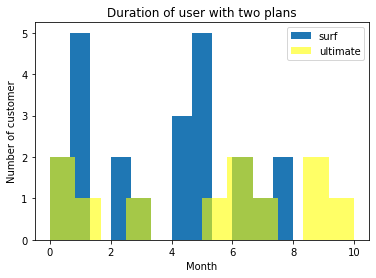

In [25]:
churned =users[users['churned'] == 1]
churned["duration(month)"] = (churned["churn_date"] - churned["reg_date"]).astype('timedelta64[M]').astype(int)
#churned
ax1= churned[churned['plan'] == 'surf']['duration(month)'].plot(kind='hist', bins=12, title='Duration of user with two plans', label='surf')
ax2 = churned[churned['plan'] == 'ultimate']['duration(month)'].plot(kind='hist', bins=12, color='yellow', alpha=0.6, label='ultimate')

# ax1.set_xlim([1, 12])
# ax2.set_xlim([1, 12])

# ax1.set_xticks(range(1,13))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of customer")
ax1.set_ylim()
ax1.legend()
plt.show()

There are two churn peak at the 1st and 5th months, but due to the sample is so limit, I couldn't make a statistical conclusion right now.

## Calls

In [26]:
# Print the general/summary information about the calls' DataFrame
calls.info(), calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


(None,
              user_id       duration
 count  137735.000000  137735.000000
 mean     1247.658046       6.745927
 std       139.416268       5.839241
 min      1000.000000       0.000000
 25%      1128.000000       1.290000
 50%      1247.000000       5.980000
 75%      1365.000000      10.690000
 max      1499.000000      37.600000)

In [27]:
# Print a sample of data for calls
calls.sample(5)

,id,user_id,call_date,duration
6638,1031_372,1031,2018-10-26,0.00
129727,1466_179,1466,2018-07-09,0.00
81069,1292_21,1292,2018-08-03,8.30
81315,1293_148,1293,2018-11-25,16.29
73094,1259_111,1259,2018-08-16,15.05



**General point of view for 'calls' table**

The 'calls' table has 137735 entries, it seems doesn't have any missing values, but I will check if it has duplicates.

There are some simple data clean processes I will address first:

1. Transform data types: 'call_date'

2. Address the 'id' column. The 'id' column has a unique format which is combination of user id and his/her call id and be connected with '_'. So it's a string data type and hard to be transformed to integer. This format affacts 'internet' and 'message' tables as well, so it need a consistent solution.

3. Ceiling the 'duration' column. 


### Fix data

#### Transform data type: 'call_date' column

In [28]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d", errors='coerce')
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


#### Check duplicates

In [29]:
calls.duplicated().sum()

0

In [30]:
calls['id'].duplicated().sum()

0

There isn't any duplicates in 'calls' table.

#### Address the 'id' column.

In [31]:
calls[['id_part1', 'id_part2']] = calls['id'].str.split("_", expand=True)
calls[['id_part1', 'id_part2']] = calls[['id_part1', 'id_part2']].apply(pd.to_numeric)
calls.head()

,id,user_id,call_date,duration,id_part1,id_part2
0,1000_93,1000,2018-12-27,8.52,1000,93
1,1000_145,1000,2018-12-27,13.66,1000,145
2,1000_247,1000,2018-12-27,14.48,1000,247
3,1000_309,1000,2018-12-28,5.76,1000,309
4,1000_380,1000,2018-12-30,4.22,1000,380


In [32]:
calls['id_part1'].max(), calls['id_part2'].max()

(1499, 1907)

My approach is to concatenate these two ids togeter. I've found the maximum of 'id_part2' is 1907, which means I can use 5 digits to contain these numbers. I'd like to use 7 digits to keep redundent. After concatenation, the new id should like 14990001907. The first 4 digits are user id, and the last 4 digit are the call id from this user.

In [33]:
calls['new_id'] = calls['id_part1'] * 10000000 + calls['id_part2']
calls.head()

,id,user_id,call_date,duration,id_part1,id_part2,new_id
0,1000_93,1000,2018-12-27,8.52,1000,93,10000000093
1,1000_145,1000,2018-12-27,13.66,1000,145,10000000145
2,1000_247,1000,2018-12-27,14.48,1000,247,10000000247
3,1000_309,1000,2018-12-28,5.76,1000,309,10000000309
4,1000_380,1000,2018-12-30,4.22,1000,380,10000000380


#### Zero calls

In [34]:
zero_calls = calls[calls['duration'] == 0.0]
zero_calls.shape

(26834, 7)

In [35]:
zero_calls['user_id'].nunique()

478

I found there are considerable proportion zero values in 'duration' column ('calls' table, almost 20% of call duration is 0.0 min). The number of users who has zero calls is 478, that means almost all users have zero calls records. Let's dive deeper...

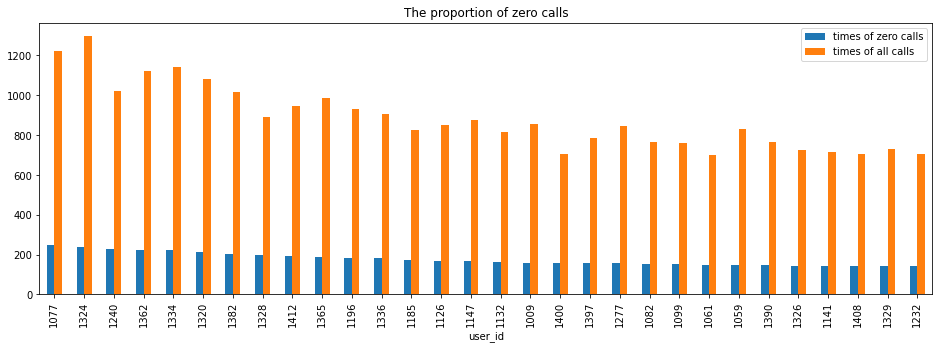

In [36]:
# get top 30 zero calls users
top30_zero_calls = zero_calls['user_id'].value_counts()[:30].reset_index()
top30_zero_calls.rename(columns={"index": "user_id", "user_id": "times of zero calls"}, inplace=True)

# get those users' all calls
all_calls = calls.groupby('user_id')['duration'].count().reset_index()
all_calls.rename(columns={"duration": "times of all calls"}, inplace=True)
#all_calls

# merge two tables
top30_zero_calls = top30_zero_calls.merge(all_calls, on='user_id', how='left')

# bar plot
top30_zero_calls.plot(kind='bar', x='user_id', title='The proportion of zero calls', figsize=(16,5))
plt.show()

We can see the proportion of top 30 users who make most zero calls remain a relatively even ratio. I assume that the reason might be they make a mistake call which duration is less than 1 second. According to the data description, "For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute", I will round them up to 1 minute.

#### Ceiling the 'duration' column

In [37]:
calls['duration(min)'] = np.ceil(calls['duration']) # ceiling decimal to integer
calls['duration(min)'] = calls['duration(min)'].apply(lambda x: 1 if x==0.0 else x) # round zero calls to 1
calls.head()

,id,user_id,call_date,duration,id_part1,id_part2,new_id,duration(min)
0,1000_93,1000,2018-12-27,8.52,1000,93,10000000093,9.0
1,1000_145,1000,2018-12-27,13.66,1000,145,10000000145,14.0
2,1000_247,1000,2018-12-27,14.48,1000,247,10000000247,15.0
3,1000_309,1000,2018-12-28,5.76,1000,309,10000000309,6.0
4,1000_380,1000,2018-12-30,4.22,1000,380,10000000380,5.0


In [38]:
calls[calls['duration(min)'] == 0].count()

id               0
user_id          0
call_date        0
duration         0
id_part1         0
id_part2         0
new_id           0
duration(min)    0
dtype: int64

Now we set all zero values to 1 minute.

In [39]:
cleaned_calls = calls[['new_id', 'user_id', 'call_date', 'duration(min)']]
cleaned_calls.head()

,new_id,user_id,call_date,duration(min)
0,10000000093,1000,2018-12-27,9.0
1,10000000145,1000,2018-12-27,14.0
2,10000000247,1000,2018-12-27,15.0
3,10000000309,1000,2018-12-28,6.0
4,10000000380,1000,2018-12-30,5.0


I've cleaned the 'calls' table.

### Enrich data

#### Add a column 'month'

In [40]:
# cleaned_calls['month'] = cleaned_calls['call_date'].dt.month
# cleaned_calls.head()

In [41]:
cleaned_calls['month'] = cleaned_calls['call_date'].dt.to_period('M')
cleaned_calls.head()

/tmp/ipykernel_104/998374523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_calls['month'] = cleaned_calls['call_date'].dt.to_period('M')


,new_id,user_id,call_date,duration(min),month
0,10000000093,1000,2018-12-27,9.0,2018-12
1,10000000145,1000,2018-12-27,14.0,2018-12
2,10000000247,1000,2018-12-27,15.0,2018-12
3,10000000309,1000,2018-12-28,6.0,2018-12
4,10000000380,1000,2018-12-30,5.0,2018-12


> That's a good point, updated

#### Distribution of calls monthly

In [42]:
cumulative_user = cleaned_users.groupby('month')['user_id'].count().reset_index()
cumulative_user.rename(columns={'index': 'month', 'user_id':'users'}, inplace=True)
#cumulative_user['users'].sum()
cumulative_user['cum_users'] = cumulative_user['users'].cumsum()
#cumulative_user

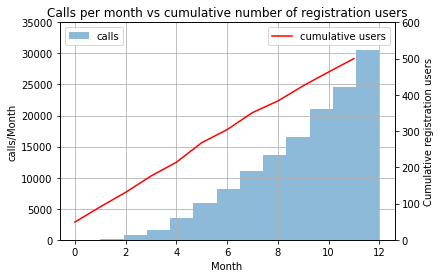

In [43]:
ax1 = cleaned_calls['call_date'].dt.month.hist(bins=12, range=(1,12), alpha=0.5, label="calls")
ax1.set_xlabel('Month')
ax1.set_ylabel("calls/Month")
ax1.set_ylim([0, 35000])
ax1.set_title("Calls per month vs cumulative number of registration users")

ax2 = ax1.twinx()
ax2 = cumulative_user['cum_users'].plot(color='red', label='cumulative users')
ax2.set_ylim([0, 600])
ax2.set_ylabel("Cumulative registration users")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

At the first glance, I thought the calls of month was cumulatively. But since the registration number of users is more and more monthly, that's why the number of calls increases by month. 

## Messages

In [44]:
# Print the general/summary information about the messages' DataFrame
messages.info(), messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


(None,
             user_id
 count  76051.000000
 mean    1245.972768
 std      139.843635
 min     1000.000000
 25%     1123.000000
 50%     1251.000000
 75%     1362.000000
 max     1497.000000)

In [45]:
# Print a sample of data for messages
messages.sample(5)

,id,user_id,message_date
50658,1329_863,1329,2018-11-21
13052,1087_8,1087,2018-12-29
42431,1278_72,1278,2018-11-20
29502,1181_176,1181,2018-06-14
37836,1250_89,1250,2018-10-05



**General point of view on 'messages' table**

There are 75051 entries, just exceed half of calls records. The maximum of user_id isn't 1499, it indicates there are customers don't send any message.

Similar to the 'calls' table, I'll transform the data type of 'message_date' column and address the 'id' column.

### Fix data

#### Check duplicates

In [46]:
messages.duplicated().sum()

0

In [47]:
messages["id"].duplicated().sum()

0

There isn't any duplicates in 'messages' table

#### Transform the data type: 'message_date' column

In [48]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d", errors='coerce')
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


#### Address the 'id' column

In [49]:
messages[['id_part1', 'id_part2']] = messages['id'].str.split("_", expand=True)
messages[['id_part1', 'id_part2']] = messages[['id_part1', 'id_part2']].apply(pd.to_numeric)
messages['id_part2'].max()

1799

In [50]:
messages['new_id'] = messages['id_part1'] * 10000000 + messages['id_part2']
messages.head()

,id,user_id,message_date,id_part1,id_part2,new_id
0,1000_125,1000,2018-12-27,1000,125,10000000125
1,1000_160,1000,2018-12-31,1000,160,10000000160
2,1000_223,1000,2018-12-31,1000,223,10000000223
3,1000_251,1000,2018-12-27,1000,251,10000000251
4,1000_255,1000,2018-12-26,1000,255,10000000255


In [51]:
cleaned_messages = messages[['new_id', 'user_id', 'message_date']]
cleaned_messages.head()

,new_id,user_id,message_date
0,10000000125,1000,2018-12-27
1,10000000160,1000,2018-12-31
2,10000000223,1000,2018-12-31
3,10000000251,1000,2018-12-27
4,10000000255,1000,2018-12-26


### Enrich data

#### Add a column 'month'

In [52]:
#cleaned_messages['month'] = cleaned_messages['message_date'].dt.month
cleaned_messages['month'] = cleaned_messages['message_date'].dt.to_period('M')
cleaned_messages.head()

/tmp/ipykernel_104/2431669023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_messages['month'] = cleaned_messages['message_date'].dt.to_period('M')


,new_id,user_id,message_date,month
0,10000000125,1000,2018-12-27,2018-12
1,10000000160,1000,2018-12-31,2018-12
2,10000000223,1000,2018-12-31,2018-12
3,10000000251,1000,2018-12-27,2018-12
4,10000000255,1000,2018-12-26,2018-12


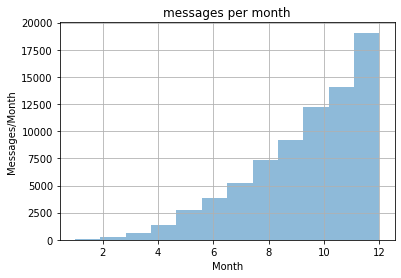

In [53]:
ax1 = cleaned_messages['message_date'].dt.month.hist(bins=12, range=(1,12), alpha=0.5, label="message")
ax1.set_xlabel('Month')
ax1.set_ylabel("Messages/Month")
ax1.set_title("messages per month")
plt.show()

## Internet

In [54]:
# Print the general/summary information about the internet DataFrame
internet.info(), internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


(None,
              user_id        mb_used
 count  104825.000000  104825.000000
 mean     1242.496361     366.713701
 std       142.053913     277.170542
 min      1000.000000       0.000000
 25%      1122.000000     136.080000
 50%      1236.000000     343.980000
 75%      1367.000000     554.610000
 max      1499.000000    1693.470000)

In [55]:
# Print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
4660,1028_217,1028,2018-05-06,363.24
24197,1110_455,1110,2018-12-25,12.18
80925,1377_350,1377,2018-08-04,145.56
75861,1357_204,1357,2018-05-31,418.28
2445,1011_185,1011,2018-11-01,65.22




**General point of view on 'internet' table**

The 'internet' table has 104825 entries and 4 columns.

Similar to 'calls' and 'messages', the 'internet' table has 'id' issue and a data type transform task on 'session_date' column. It also has zero data users. However, it doesn't have obvious missing values and duplicates, I'll check it later.

### Fix data

#### Check duplicates

In [56]:
internet.duplicated().sum()

0

In [57]:
internet['id'].duplicated().sum()

0

The 'internet' table doesn't have duplicates.

#### Transform the data type: 'session_date' column

In [58]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d", errors='coerce')
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


#### Address the 'id' column

In [59]:
internet[['id_part1', 'id_part2']] = internet['id'].str.split("_", expand=True)
internet[['id_part1', 'id_part2']] = internet[['id_part1', 'id_part2']].apply(pd.to_numeric)
internet['id_part2'].max()

850

In [60]:
internet['new_id'] = internet['id_part1'] * 10000000 + internet['id_part2']
internet.head()

,id,user_id,session_date,mb_used,id_part1,id_part2,new_id
0,1000_13,1000,2018-12-29,89.86,1000,13,10000000013
1,1000_204,1000,2018-12-31,0.00,1000,204,10000000204
2,1000_379,1000,2018-12-28,660.40,1000,379,10000000379
3,1000_413,1000,2018-12-26,270.99,1000,413,10000000413
4,1000_442,1000,2018-12-27,880.22,1000,442,10000000442


#### Zero data users

In [61]:
zero_users = internet[internet['mb_used'] == 0.0]
zero_users.shape

(13747, 7)

In [62]:
zero_users['user_id'].nunique()

477

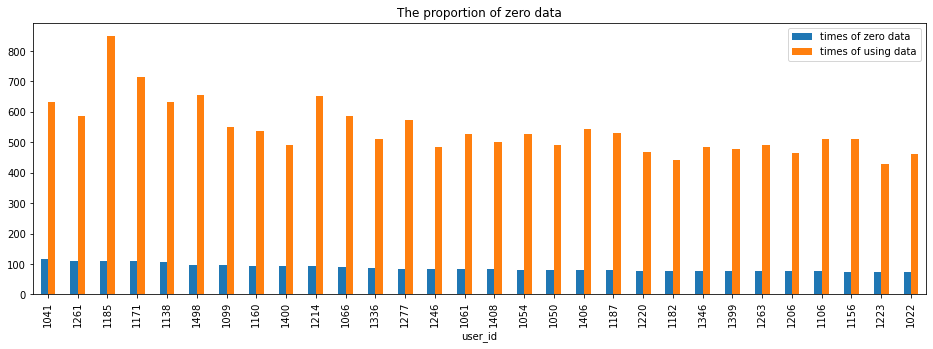

In [63]:
# get top 30 zero calls users
top30_zero_users = zero_users['user_id'].value_counts()[:30].reset_index()
top30_zero_users.rename(columns={"index": "user_id", "user_id": "times of zero data"}, inplace=True)

# get those users' all calls
all_users = internet.groupby('user_id')['mb_used'].count().reset_index()
all_users.rename(columns={"mb_used": "times of using data"}, inplace=True)
#all_calls

# merge two tables
top30_zero_users = top30_zero_users.merge(all_users, on='user_id', how='left')

# bar plot
top30_zero_users.plot(kind='bar', x='user_id', title='The proportion of zero data', figsize=(16,5))
plt.show()

Compared to zero calls, I believe zero data usages are more reasonalable. One reason is nearly all users (477) have zero data records, and the ratio of zero data to normal data usage are even. The second reason is that it's more likely happend if user open a web browser and shut it down very quickly, although there isn't any content on the screen, it has little data at background.

According to data description, "For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up". So I won't round them up, just keep them as zero.

In [64]:
cleaned_internet = internet[["new_id", 'user_id', 'session_date', 'mb_used']]
cleaned_internet

,new_id,user_id,session_date,mb_used
0,10000000013,1000,2018-12-29,89.86
1,10000000204,1000,2018-12-31,0.00
2,10000000379,1000,2018-12-28,660.40
3,10000000413,1000,2018-12-26,270.99
4,10000000442,1000,2018-12-27,880.22
...,...,...,...,...
104820,14990000215,1499,2018-10-20,218.06
104821,14990000216,1499,2018-12-30,304.72
104822,14990000217,1499,2018-09-22,292.75
104823,14990000218,1499,2018-12-07,0.00


### Enrich data

#### Add a column 'month'

In [65]:
#cleaned_internet['month'] = cleaned_internet['session_date'].dt.month
cleaned_internet['month'] = cleaned_internet['session_date'].dt.to_period('M')
cleaned_internet.head()

/tmp/ipykernel_104/456653184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_internet['month'] = cleaned_internet['session_date'].dt.to_period('M')


,new_id,user_id,session_date,mb_used,month
0,10000000013,1000,2018-12-29,89.86,2018-12
1,10000000204,1000,2018-12-31,0.00,2018-12
2,10000000379,1000,2018-12-28,660.40,2018-12
3,10000000413,1000,2018-12-26,270.99,2018-12
4,10000000442,1000,2018-12-27,880.22,2018-12


[Add additional factors to the data if you believe they might be useful.]

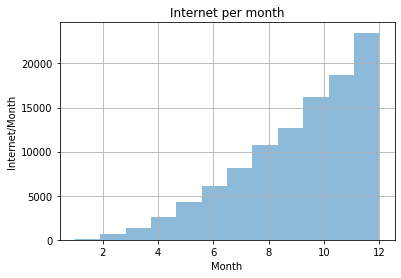

In [66]:
ax1 = cleaned_internet['session_date'].dt.month.hist(bins=12, range=(1,12), alpha=0.5)
ax1.set_xlabel('Month')
ax1.set_ylabel("Internet/Month")
ax1.set_title("Internet per month")
plt.show()

## Study plan conditions

In [67]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [68]:
# Calculate the number of calls made by each user per month. Save the result.
monthly_calls_by_user = cleaned_calls.groupby(['user_id', 'month'])['new_id'].count().reset_index()
monthly_calls_by_user.rename(columns={"new_id":"calling times"}, inplace=True)
monthly_calls_by_user

,user_id,month,calling times
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [69]:
# Calculate the amount of minutes spent by each user per month. Save the result.
monthly_minutes_by_user = cleaned_calls.groupby(['user_id', 'month'])['duration(min)'].sum().reset_index()
monthly_minutes_by_user.rename(columns={"duration(min)":"calling duration(min)"}, inplace=True)
monthly_minutes_by_user

,user_id,month,calling duration(min)
0,1000,2018-12,124.0
1,1001,2018-08,187.0
2,1001,2018-09,326.0
3,1001,2018-10,411.0
4,1001,2018-11,441.0
...,...,...,...
2253,1498,2018-12,346.0
2254,1499,2018-09,352.0
2255,1499,2018-10,397.0
2256,1499,2018-11,314.0


In [70]:
monthly_calls_by_user_v1 = cleaned_calls.groupby(['user_id','month']).agg({'duration(min)' : ('count','sum')}).reset_index()
monthly_calls_by_user_v1

user_id    month duration(min)       
                              count    sum
0       1000  2018-12            16  124.0
1       1001  2018-08            27  187.0
2       1001  2018-09            49  326.0
3       1001  2018-10            65  411.0
4       1001  2018-11            64  441.0
...      ...      ...           ...    ...
2253    1498  2018-12            39  346.0
2254    1499  2018-09            41  352.0
2255    1499  2018-10            53  397.0
2256    1499  2018-11            45  314.0
2257    1499  2018-12            65  505.0

[2258 rows x 4 columns]

In [71]:
monthly_calls_by_user_v2 = cleaned_calls.pivot_table(index = ('user_id','month'), values='duration(min)' , aggfunc=('count','sum')).reset_index()
monthly_calls_by_user_v2

,user_id,month,count,sum
0,1000,2018-12,16,124.0
1,1001,2018-08,27,187.0
2,1001,2018-09,49,326.0
3,1001,2018-10,65,411.0
4,1001,2018-11,64,441.0
...,...,...,...,...
2253,1498,2018-12,39,346.0
2254,1499,2018-09,41,352.0
2255,1499,2018-10,53,397.0
2256,1499,2018-11,45,314.0


> Updated

In [72]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_messages_by_user = cleaned_messages.groupby(['user_id', 'month'])['new_id'].count().reset_index()
monthly_messages_by_user.rename(columns={"new_id":"messages"}, inplace=True)
monthly_messages_by_user

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [73]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
monthly_internet_by_user = cleaned_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#monthly_internet_by_user.rename(columns={"new_id":"messages"}, inplace=True)
monthly_internet_by_user['gb_used'] = np.ceil(monthly_internet_by_user['mb_used'] / 1024)
monthly_internet_by_user.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [74]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = monthly_calls_by_user.merge(monthly_minutes_by_user, on=["user_id", 'month'], how='outer')
merged_df = merged_df.merge(monthly_messages_by_user, on=["user_id", 'month'], how='outer')
merged_df = merged_df.merge(monthly_internet_by_user, on=["user_id", 'month'], how='outer')
merged_df = merged_df.merge(cleaned_users[['user_id', 'plan_cate']], on='user_id', how='right')
merged_df

,user_id,month,calling times,calling duration(min),messages,mb_used,gb_used,plan_cate
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0,1
1,1001,2018-08,27.0,187.0,30.0,6919.15,7.0,0
2,1001,2018-09,49.0,326.0,44.0,13314.82,14.0,0
3,1001,2018-10,65.0,411.0,53.0,22330.49,22.0,0
4,1001,2018-11,64.0,441.0,36.0,18504.30,19.0,0
...,...,...,...,...,...,...,...,...
2298,1498,2018-12,39.0,346.0,NaN,23137.69,23.0,0
2299,1499,2018-09,41.0,352.0,NaN,12984.76,13.0,0
2300,1499,2018-10,53.0,397.0,NaN,19492.43,20.0,0
2301,1499,2018-11,45.0,314.0,NaN,16813.83,17.0,0


Before calculating the revenue, I will fill NaN values which be generated by outer merge.

In [75]:
merged_df.isna().sum()

user_id                    0
month                     10
calling times             45
calling duration(min)     45
messages                 497
mb_used                   26
gb_used                   26
plan_cate                  0
dtype: int64

Besides of NaN values in 'calls', 'messages' and 'internet', I found there were 10 missing values in the 'month' column.

In [76]:
merged_df[merged_df['month'].isna()]

,user_id,month,calling times,calling duration(min),messages,mb_used,gb_used,plan_cate
86,1025,NaT,NaN,NaN,NaN,NaN,NaN,1
612,1129,NaT,NaN,NaN,NaN,NaN,NaN,0
682,1143,NaT,NaN,NaN,NaN,NaN,NaN,0
1285,1269,NaT,NaN,NaN,NaN,NaN,NaN,1
1297,1275,NaT,NaN,NaN,NaN,NaN,NaN,1
1418,1307,NaT,NaN,NaN,NaN,NaN,NaN,0
1466,1319,NaT,NaN,NaN,NaN,NaN,NaN,0
1762,1378,NaT,NaN,NaN,NaN,NaN,NaN,0
2139,1463,NaT,NaN,NaN,NaN,NaN,NaN,1
2189,1473,NaT,NaN,NaN,NaN,NaN,NaN,0


I decide to delete those 10 users from merged table.

In [77]:
merged_df = merged_df.dropna(subset=['month'])

Then fill missing values in 'calls', 'messages', 'internet' to 0

In [78]:
merged_df = merged_df.fillna(0)

In [79]:
# Add the plan information
plans['plan_cate'] = plans['plan_name'].apply(lambda x: 0 if x=='surf' else 1)
merged_df = merged_df.merge(plans, on='plan_cate', how='left')
merged_df.head()

,user_id,month,calling times,calling duration(min),messages,mb_used,gb_used,plan_cate,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0,1,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27.0,187.0,30.0,6919.15,7.0,0,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49.0,326.0,44.0,13314.82,14.0,0,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65.0,411.0,53.0,22330.49,22.0,0,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64.0,441.0,36.0,18504.30,19.0,0,50,15360,500,20,10,0.03,0.03,surf


### Calculate the monthly revenue for each user

In [80]:
# Calculate the monthly revenue for each user
def calculate_revenue(row):
    plan = row['plan_cate']
    calls = row['calling duration(min)']
    messages = row['messages']
    gb_used = row['gb_used']
    plan_cost = row['usd_monthly_pay']
    calls_cost = max(0, (calls - row['minutes_included']) * row['usd_per_minute'])
    message_cost = max(0, (messages - row['messages_included']) * row['usd_per_message'])
    internet_cost = max(0, (gb_used - row['mb_per_month_included']/1024) * row['usd_per_gb'])
    return plan_cost + calls_cost + message_cost + internet_cost

merged_df['monthly_revenue'] = merged_df.apply(calculate_revenue, axis=1)
merged_df.sample(10)

,user_id,month,calling times,calling duration(min),messages,mb_used,gb_used,plan_cate,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
1234,1259,2018-11,14.0,108.0,32.0,3239.70,4.0,0,50,15360,500,20,10,0.03,0.03,surf,20.00
396,1082,2018-05,105.0,725.0,28.0,14537.34,15.0,0,50,15360,500,20,10,0.03,0.03,surf,26.75
1441,1313,2018-12,93.0,652.0,44.0,12318.71,13.0,0,50,15360,500,20,10,0.03,0.03,surf,24.56
680,1144,2018-04,21.0,165.0,21.0,8196.03,9.0,1,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
876,1182,2018-11,30.0,233.0,0.0,21903.66,22.0,0,50,15360,500,20,10,0.03,0.03,surf,90.00
373,1078,2018-11,16.0,97.0,36.0,8193.15,9.0,0,50,15360,500,20,10,0.03,0.03,surf,20.00
168,1043,2018-06,12.0,82.0,30.0,9891.43,10.0,1,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
598,1127,2018-07,35.0,250.0,10.0,21608.77,22.0,0,50,15360,500,20,10,0.03,0.03,surf,90.00
835,1174,2018-05,26.0,186.0,16.0,4842.87,5.0,0,50,15360,500,20,10,0.03,0.03,surf,20.00
1757,1380,2018-09,59.0,417.0,48.0,15455.84,16.0,1,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00


## Study user behaviour

### Calls

Add a plan indicator to 'cleaned_calls' table

In [81]:
cleaned_calls = cleaned_calls.merge(cleaned_users[['user_id', 'plan_cate']], on='user_id', how='left')

In [82]:
calls_0 = cleaned_calls[cleaned_calls['plan_cate'] == 0]
calls_1 = cleaned_calls[cleaned_calls['plan_cate'] == 1]

In [83]:
calls_1.head()

,new_id,user_id,call_date,duration(min),month,plan_cate
0,10000000093,1000,2018-12-27,9.0,2018-12,1
1,10000000145,1000,2018-12-27,14.0,2018-12,1
2,10000000247,1000,2018-12-27,15.0,2018-12,1
3,10000000309,1000,2018-12-28,6.0,2018-12,1
4,10000000380,1000,2018-12-30,5.0,2018-12,1


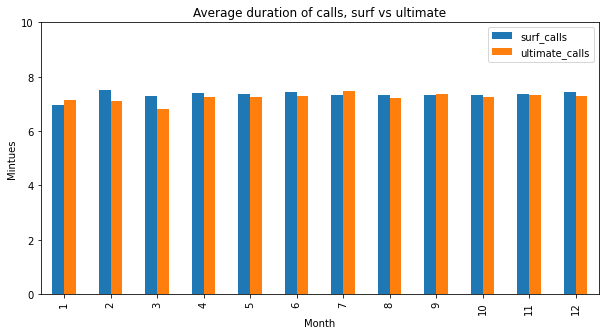

In [84]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
months = pd.Series(range(1, 13))
avg_calls = pd.DataFrame({"Month": months})
avg_calls['surf_calls'] = calls_0.groupby('month')['duration(min)'].mean().reset_index(drop=True)
avg_calls['ultimate_calls'] = calls_1.groupby('month')['duration(min)'].mean().reset_index(drop=True)
#avg_calls.head()

avg_calls.plot(x="Month", y=['surf_calls', 'ultimate_calls'], kind='bar', 
               title='Average duration of calls, surf vs ultimate',
              ylabel='Mintues', ylim=[0, 10], figsize=(10, 5))

plt.show()

No matter users in surf or utimate plan, the monthly average duration of calls are nearly same.

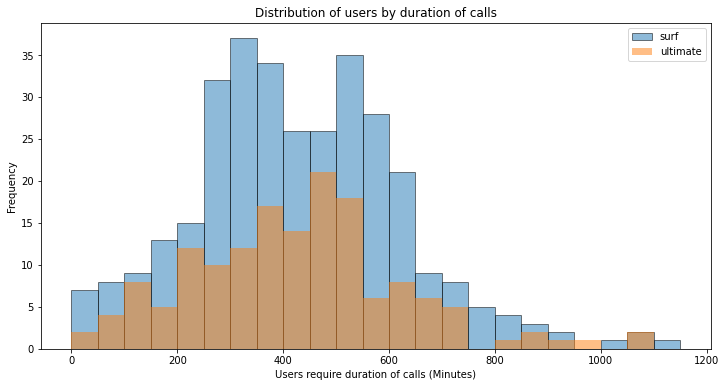

In [85]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
calls_0_grouped = calls_0.groupby(['user_id', 'month'])['duration(min)'].sum()
calls_1_grouped = calls_1.groupby(['user_id', 'month'])['duration(min)'].sum()
ax1 = calls_0_grouped.groupby('user_id').mean().plot(kind='hist', 
                                                    bins=np.arange(0, 1200, 50),
                                                    title='Distribution of users by duration of calls',
                                                    label='surf', alpha=0.5, 
                                                    edgecolor='black',
                                                    figsize=(12, 6))
ax2 = calls_1_grouped.groupby('user_id').mean().plot(kind='hist', bins=np.arange(0, 1200, 50), alpha=0.5, label='ultimate')

ax1.set_xlabel("Users require duration of calls (Minutes)")
plt.legend()
plt.show()

The distribution of users require duration of calls from the 'surf' plan has a normal distribution with two peaks at 300-350 and 500-550 minutes. For the other plan, the ultimate, has a slight right skew normal distribution with a wider variance.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [86]:
# Calculate the mean and the variance of the monthly call duration
surf_calls_mean = calls_0_grouped.mean()
surf_calls_var = calls_0_grouped.var()
surf_calls_sd = calls_0_grouped.std()
ultimate_calls_mean = calls_1_grouped.mean()
ultimate_calls_var = calls_1_grouped.var()
ultimate_calls_sd = calls_1_grouped.std()
print(f"""The means and variance of the monthly call duration:
        For 'surf' plan: mean is  {surf_calls_mean:.2f}, variance is {surf_calls_var:.2f}, and the standard deviation is {surf_calls_sd:.2f}.
        For 'ultimate' plan: mean is  {ultimate_calls_mean:.2f}, variance is {ultimate_calls_var:.2f}, and the standard deviation is {ultimate_calls_sd:.2f}.
""")

The means and variance of the monthly call duration:
        For 'surf' plan: mean is  448.30, variance is 55211.13, and the standard deviation is 234.97.
        For 'ultimate' plan: mean is  446.78, variance is 59531.15, and the standard deviation is 243.99.



In [87]:
calls_0_grouped.head()

user_id  month  
1001     2018-08    187.0
         2018-09    326.0
         2018-10    411.0
         2018-11    441.0
         2018-12    422.0
Name: duration(min), dtype: float64

In [88]:
calls_grouped = cleaned_calls.groupby(['user_id', 'month','plan_cate'])['duration(min)'].sum().reset_index()
calls_grouped

,user_id,month,plan_cate,duration(min)
0,1000,2018-12,1,124.0
1,1001,2018-08,0,187.0
2,1001,2018-09,0,326.0
3,1001,2018-10,0,411.0
4,1001,2018-11,0,441.0
...,...,...,...,...
2253,1498,2018-12,0,346.0
2254,1499,2018-09,0,352.0
2255,1499,2018-10,0,397.0
2256,1499,2018-11,0,314.0


In [89]:
pd.pivot_table(calls_grouped, index='plan_cate', values=['duration(min)'], aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,duration(min),duration(min),duration(min),duration(min)
plan_cate,,,,
0,448.304207,55211.134082,234.970496,443.0
1,446.775596,59531.149010,243.990059,440.0


> Good point! Updated

In [90]:
surf_calls_mean, ultimate_calls_mean

(448.3042071197411, 446.77559607293125)

In [91]:
calls_0_grouped

user_id  month  
1001     2018-08    187.0
         2018-09    326.0
         2018-10    411.0
         2018-11    441.0
         2018-12    422.0
                    ...  
1498     2018-12    346.0
1499     2018-09    352.0
         2018-10    397.0
         2018-11    314.0
         2018-12    505.0
Name: duration(min), Length: 1545, dtype: float64

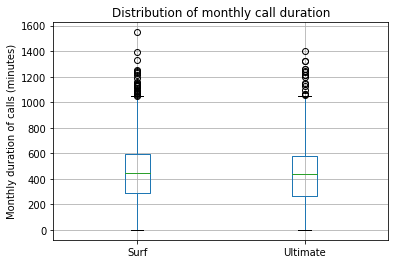

In [92]:
# Plot a boxplot to visualize the distribution of the monthly call duration
monthly_avg_calls = pd.concat([calls_0_grouped, calls_1_grouped], axis=1)
monthly_avg_calls.columns = ['Surf', 'Ultimate']
boxplot = monthly_avg_calls.boxplot()
boxplot.set_title('Distribution of monthly call duration')
boxplot.set_ylabel('Monthly duration of calls (minutes)')
plt.show()

Both distributions of monthly duration of calls following right skew distruibution. 

The means of the monthly call duration:
* For 'surf' plan: mean is  448.30, variance is 55211.13.
* For 'ultimate' plan: mean is  446.78, variance is 59531.15.

From boxplot and numerical data, I didn't tell there is significant difference between two plans in term of duration of calls.

### Messages

In [93]:
cleaned_messages = cleaned_messages.merge(cleaned_users[['user_id', 'plan_cate']], on='user_id', how='left')
messages_0 = cleaned_messages[cleaned_messages['plan_cate'] == 0]
messages_1 = cleaned_messages[cleaned_messages['plan_cate'] == 1]
messages_1.sample(5)

,new_id,user_id,message_date,month,plan_cate
74647,14820000060,1482,2018-11-01,2018-11,1
6882,10570000206,1057,2018-12-11,2018-12,1
3842,10380000195,1038,2018-12-29,2018-12,1
70929,14620000037,1462,2018-11-02,2018-11,1
7478,10590000360,1059,2018-07-15,2018-07,1


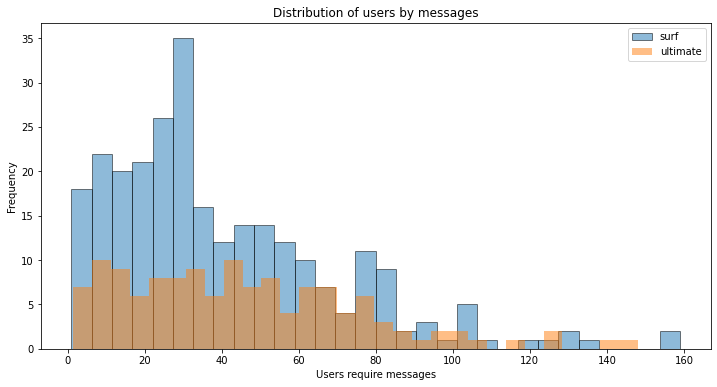

In [94]:
# Compare the number of messages users of each plan tend to send each month
messages_0_grouped = messages_0.groupby(["user_id", "month"])['new_id'].count()
messages_1_grouped = messages_1.groupby(["user_id", "month"])['new_id'].count()
ax1 = messages_0_grouped.groupby('user_id').mean().plot(kind='hist', 
                                                    bins=30,
                                                    title='Distribution of users by messages',
                                                    label='surf', alpha=0.5, 
                                                    edgecolor='black',
                                                    figsize=(12, 6))
ax2 = messages_1_grouped.groupby('user_id').mean().plot(kind='hist', bins=30, alpha=0.5, label='ultimate')

ax1.set_xlabel("Users require messages")
plt.legend()
plt.show()

#### how many users don't send message

In [95]:
cleaned_messages['user_id'].nunique()

402

There are 98 users (one fifth of all users) don't send any message during a whole year.

**Formulate conclusions**

In [96]:
# Calculate the mean and the variance of the monthly messages
surf_messages_mean = messages_0_grouped.mean()
surf_messages_var = messages_0_grouped.var()
surf_messages_sd = messages_0_grouped.std()
ultimate_messages_mean = messages_1_grouped.mean()
ultimate_messages_var = messages_1_grouped.var()
ultimate_messages_sd = messages_1_grouped.std()
print(f"""The means and variacne of the monthly messages:
        For 'surf' plan: mean is  {surf_messages_mean:.2f}, variance is {surf_messages_var:.2f}, and the standard deviation is {surf_messages_sd:.2f}.
        For 'ultimate' plan: mean is  {ultimate_messages_mean:.2f}, variance is {ultimate_messages_var:.2f}, and the standard deviation is {ultimate_messages_sd:.2f}.
""")

The means and variacne of the monthly messages:
        For 'surf' plan: mean is  40.11, variance is 1091.34, and the standard deviation is 33.04.
        For 'ultimate' plan: mean is  46.30, variance is 1085.18, and the standard deviation is 32.94.



In [97]:
message_grouped = cleaned_messages.groupby(['user_id', 'month','plan_cate'])['new_id'].count().reset_index()
pd.pivot_table(message_grouped, index='plan_cate', values=['new_id'], aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,new_id,new_id,new_id,new_id
plan_cate,,,,
0,40.109656,1091.344231,33.035500,32
1,46.296233,1085.183108,32.942118,41


The distributions of users tend to send messages between two plans are different, although most of messages are less than 100. 

For the 'surf' plan, the distribution is a parently right skew distribution with a peak at 30 messages. 

For the 'ultimate' plan, it more likes a uniform distribution. In perticular, the number of users sending messages less than 80 are nearly same.

### Internet

In [98]:
internet.head()

,id,user_id,session_date,mb_used,id_part1,id_part2,new_id
0,1000_13,1000,2018-12-29,89.86,1000,13,10000000013
1,1000_204,1000,2018-12-31,0.00,1000,204,10000000204
2,1000_379,1000,2018-12-28,660.40,1000,379,10000000379
3,1000_413,1000,2018-12-26,270.99,1000,413,10000000413
4,1000_442,1000,2018-12-27,880.22,1000,442,10000000442


In [99]:
internet[internet['mb_used'] == 0.0].count()

id              13747
user_id         13747
session_date    13747
mb_used         13747
id_part1        13747
id_part2        13747
new_id          13747
dtype: int64

In [100]:
13747 / len(internet)

0.1311423801574052

In [101]:
cleaned_internet = cleaned_internet.merge(cleaned_users[['user_id', 'plan_cate']], on='user_id', how='left')
internet_0 = cleaned_internet[cleaned_internet['plan_cate'] == 0]
internet_1 = cleaned_internet[cleaned_internet['plan_cate'] == 1]
internet_1.sample(5)

,new_id,user_id,session_date,mb_used,month,plan_cate
47323,12110000200,1211,2018-11-18,199.64,2018-11,1
8017,10430000066,1043,2018-09-27,81.73,2018-09,1
28206,11280000360,1128,2018-11-19,707.94,2018-11,1
83110,13880000008,1388,2018-12-20,434.94,2018-12,1
5845,10320000006,1032,2018-11-23,88.39,2018-11,1


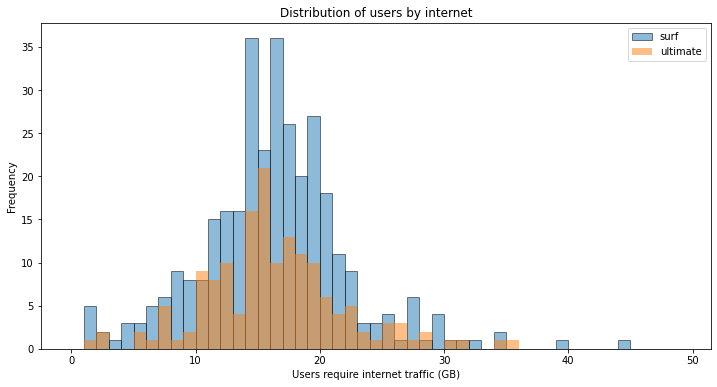

In [102]:
# Compare the amount of internet traffic consumed by users per plan
internet_0_grouped = np.ceil(internet_0.groupby(["user_id", "month"])['mb_used'].sum() / 1024)
internet_1_grouped = np.ceil(internet_1.groupby(["user_id", "month"])['mb_used'].sum() / 1024)
ax1 = internet_0_grouped.groupby('user_id').mean().plot(kind='hist', 
                                                    bins=np.arange(0,50,1),
                                                    title='Distribution of users by internet',
                                                    label='surf', alpha=0.5, 
                                                    edgecolor='black',
                                                    figsize=(12, 6))
ax2 = internet_1_grouped.groupby('user_id').mean().plot(kind='hist', bins=np.arange(0,50,1), alpha=0.5, label='ultimate')

ax1.set_xlabel("Users require internet traffic (GB)")
plt.legend()
plt.show()

In [103]:
# Calculate the mean and the variance of the monthly internet traffic
surf_internet_mean = internet_0_grouped.mean()
surf_internet_var = internet_0_grouped.var()
surf_internet_sd = internet_0_grouped.std()
ultimate_internet_mean = internet_1_grouped.mean()
ultimate_internet_var = internet_1_grouped.var()
ultimate_internet_sd = internet_1_grouped.std()
print(f"""The means and variance of the monthly internet traffic:
        For 'surf' plan: mean is  {surf_internet_mean:.2f}, variance is {surf_internet_var:.2f}, and the standard deviation is {surf_internet_sd:.2f}.
        For 'ultimate' plan: mean is  {ultimate_internet_mean:.2f}, variance is {ultimate_internet_var:.2f}, and the standard deviation is {ultimate_internet_sd:.2f}.
""")

The means and variance of the monthly internet traffic:
        For 'surf' plan: mean is  16.83, variance is 59.47, and the standard deviation is 7.71.
        For 'ultimate' plan: mean is  17.33, variance is 58.49, and the standard deviation is 7.65.



In [104]:
internet_grouped = np.ceil(cleaned_internet.groupby(['user_id', 'month','plan_cate'])['mb_used'].sum()/1024).reset_index()
pd.pivot_table(internet_grouped, index='plan_cate', values=['mb_used'], aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,mb_used,mb_used,mb_used,mb_used
plan_cate,,,,
0,16.831194,59.473734,7.711922,17.0
1,17.331015,58.494733,7.648185,17.0


Both distributions of users of internet usage are normal distribution. 

For the 'surf' plan, the peak of number of users locates between 15-19 GB.

For the 'ultimate' plan, the peak of number of users locates between 15-19 GB as well.

From the statistic desciption, the mean of 'ultimate' plan is slightly higher than 'surf' plan and the standard deviation is less.

## Revenue

In [105]:
revenue_0_df = merged_df[merged_df['plan_cate'] == 0][['user_id', 'month', 'plan_cate', 'monthly_revenue']]
revenue_1_df = merged_df[merged_df['plan_cate'] == 1][['user_id', 'month', 'plan_cate', 'monthly_revenue']]
revenue_1_df.sample(5)

,user_id,month,plan_cate,monthly_revenue
1599,1346,2018-12,1,70.0
716,1150,2018-12,1,70.0
1204,1255,2018-10,1,70.0
2186,1475,2018-08,1,70.0
2257,1493,2018-08,1,70.0


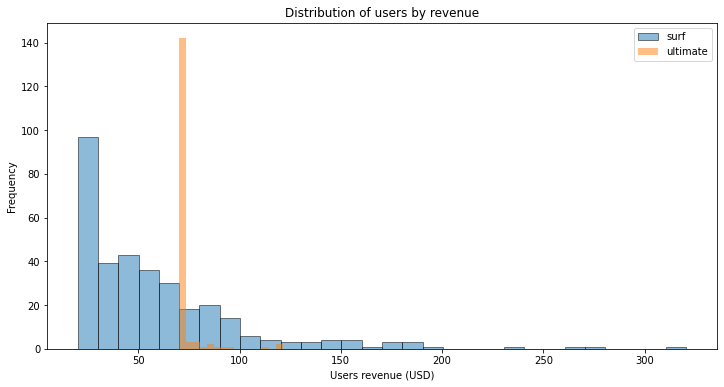

In [106]:
ax1 = revenue_0_df.groupby('user_id')['monthly_revenue'].mean().plot(kind='hist', 
                                                    bins=30,
                                                    title='Distribution of users by revenue',
                                                    label='surf', alpha=0.5, 
                                                    edgecolor='black',
                                                    figsize=(12, 6))
ax2 = revenue_1_df.groupby('user_id')['monthly_revenue'].mean().plot(kind='hist', 
                                                                     bins=15, alpha=0.5, label='ultimate')

ax1.set_xlabel("Users revenue (USD)")
plt.legend()
plt.show()

In [107]:
revenue_0_grouped = revenue_0_df.groupby('user_id')['monthly_revenue'].mean()
revenue_1_grouped = revenue_1_df.groupby('user_id')['monthly_revenue'].mean()

In [108]:
# Calculate the mean and the variance of the monthly revenue
surf_revenue_mean = revenue_0_grouped.mean()
surf_revenue_var = revenue_0_grouped.var()
surf_revenue_sd = revenue_0_grouped.std()
ultimate_revenue_mean = revenue_1_grouped.mean()
ultimate_revenue_var = revenue_1_grouped.var()
ultimate_revenue_sd = revenue_1_grouped.std()
print(f"""The means and variance of the monthly revenue:
        For 'surf' plan: mean is  {surf_revenue_mean:.2f}, variance is {surf_revenue_var:.2f}, and the standard deviation is {surf_revenue_sd:.2f}.
        For 'ultimate' plan: mean is  {ultimate_revenue_mean:.2f}, variance is {ultimate_revenue_var:.2f}, and the standard deviation is {ultimate_revenue_sd:.2f}.
""")

The means and variance of the monthly revenue:
        For 'surf' plan: mean is  58.38, variance is 1902.16, and the standard deviation is 43.61.
        For 'ultimate' plan: mean is  71.82, variance is 55.13, and the standard deviation is 7.42.



In [109]:
revenue_0_grouped.describe(), revenue_1_grouped.describe()

(count    333.000000
 mean      58.376449
 std       43.613797
 min       20.000000
 25%       28.000000
 50%       47.468000
 75%       72.500000
 max      320.635000
 Name: monthly_revenue, dtype: float64,
 count    157.000000
 mean      71.823284
 std        7.424766
 min       70.000000
 25%       70.000000
 50%       70.000000
 75%       70.000000
 max      121.333333
 Name: monthly_revenue, dtype: float64)

Both distributions are more likely to Pareto principle, i.e.80-20 rule. That means the most of user renvenues equal to the monthly fix charge of each plan and gather in a certain range which greater than monthly fix charge.

For the 'surf' plan, although the monthly fix charge is only 20, there is 75\% users spend a range between 20 to 72.5. Therefore the mean of revenue is 58.38 with a widely std 43.61. It also has a long tail of 100 to 200, there are even outliers above 300.

On the other hand, for the 'ultimate' plan, the users who only spend monthly fix charge are dominant (more than 75\%), so that the mean is only 71.82 with a samll std 7.42.

In [110]:
revenue_df = merged_df[['user_id', 'month', 'plan_name', 'monthly_revenue']].groupby(['user_id', 'plan_name'])['monthly_revenue'].mean().reset_index()
revenue_df.rename(columns={'user_id': 'user', 'plan_name':'plan', 'monthly_revenue': 'revenue'}, inplace=True)
revenue_df

,user,plan,revenue
0,1000,ultimate,70.000000
1,1001,surf,50.018000
2,1002,surf,33.333333
3,1003,surf,159.050000
4,1004,surf,76.250000
...,...,...,...
485,1495,surf,118.407500
486,1496,surf,28.000000
487,1497,ultimate,70.000000
488,1498,surf,77.272727


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


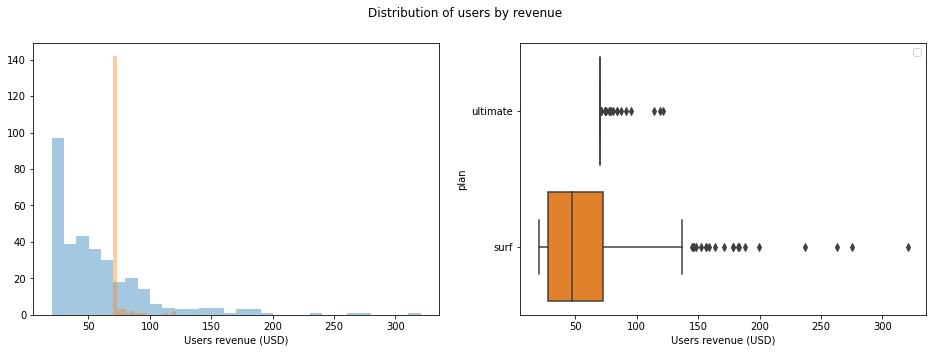

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
df1 = revenue_0_df.groupby('user_id')['monthly_revenue'].mean()
df2 = revenue_1_df.groupby('user_id')['monthly_revenue'].mean()
sns.distplot(df1,bins=30,  kde=False, label='surf',ax=axes[0])
sns.distplot(df2,bins=15, kde=False,label='ultimate',ax=axes[0])
sns.boxplot(data=revenue_df, x="revenue", y="plan", ax=axes[1])
#axes[0].set_title("Distribution of users by revenue")
axes[0].set_xlabel("Users revenue (USD)")
axes[1].set_xlabel("Users revenue (USD)")
fig.suptitle("Distribution of users by revenue")
plt.legend()
plt.show()

## Test statistical hypotheses

### Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs


* Null hypothesis $H_0$: The average revenue from users of the Ultimate and Surf calling plans are same.
* Alternative hypothesis $H_1$: The average revenue from users of the Ultimate and Surf calling plans are different.
* Statistical test: Independent Samples t-test
* $\alpha-value: 0.05$

In [112]:
# Test the hypotheses
alpha = 0.05
results = st.ttest_ind(revenue_0_grouped, revenue_1_grouped, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 8.692101224680108e-08
We reject the null hypothesis


After the statistical test, I think the revenue from two plans is different.

### Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [113]:
NYNJ_users = cleaned_users[cleaned_users['city_cate'] == 1][['user_id']]
other_users = cleaned_users[cleaned_users['city_cate'] == 0][['user_id']]
NYNJ_users.head()

,user_id
14,1014
22,1022
24,1024
27,1027
31,1031


In [114]:
other_users.head()

,user_id
0,1000
1,1001
2,1002
3,1003
4,1004


In [115]:
NYNJ_revenue = merged_df.merge(NYNJ_users, on='user_id', how='inner')
other_revenue = merged_df.merge(other_users, on='user_id', how='inner')
NYNJ_revenue_grouped = NYNJ_revenue.groupby('user_id')['monthly_revenue'].mean()
other_revenue_grouped = other_revenue.groupby('user_id')['monthly_revenue'].mean()

In [116]:
# Calculate the mean and the variance of the revenue from different areas
NYNJ_revenue_mean = NYNJ_revenue_grouped.mean()
NYNJ_revenue_var = NYNJ_revenue_grouped.var()
NYNJ_revenue_sd = NYNJ_revenue_grouped.std()
other_revenue_mean = other_revenue_grouped.mean()
other_revenue_var = other_revenue_grouped.var()
other_revenue_sd = other_revenue_grouped.std()
print(f"""The means and variance of the revenue from different areas:
        For NYNJ area: mean is  {NYNJ_revenue_mean:.2f}, variance is {NYNJ_revenue_var:.2f}, and the standard deviation is {NYNJ_revenue_sd:.2f}.
        For other areas: mean is  {other_revenue_mean:.2f}, variance is {other_revenue_var:.2f}, and the standard deviation is {other_revenue_sd:.2f}.
""")

The means and variance of the revenue from different areas:
        For NYNJ area: mean is  60.75, variance is 1133.23, and the standard deviation is 33.66.
        For other areas: mean is  63.09, variance is 1395.63, and the standard deviation is 37.36.



* Null hypothesis $H_0$: The average revenue of users from NY-NJ area and other areas are same.
* Alternative hypothesis $H_1$: The average revenue of users from NY-NJ area and other areas are same are different.
* Statistical test: Independent Samples t-test
* $\alpha-value: 0.05$

In [117]:
# Test the hypotheses
alpha = 0.05
results = st.ttest_ind(NYNJ_revenue_grouped, other_revenue_grouped, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.568445784183814
We can't reject the null hypothesis


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

### Data Description and Preprocessing

There are 5 tables. The 'users' table contains user's demograph and plan information. The 'calls', 'messages', and 'internet' tables contain users' behavior. The 'plans' table shows detailed price and provided services of two plans.

The general quality of data is good, although there are some columns need be cleaned, e.g. some columns were transformed to appropriate data types, some columns need be ceiled to integer, etc.

There are considerable proportaion of zero values in 'calls' and 'internet' tables. I assume the reason is users manipulate the phone in a flash that less than minimum charging limit. According to someone's suggestion from Discord, I round those zero values upto 1. 

I also found 10 users don't have any transactions, so I dropped them.

### Analysis 

After merging and aggregating users and their consumption behavior, I mainly compared three kinds of comsumption between two plans. 

There is tiny difference between calls and internet of two plans, they have similar distributions. For messages, the distribution of users from 'surf' plan is a right skew normal distribution, whereas the distribution of the 'ultimate' plan is more likely a uniform distribution.

There is significant difference of anvenue between two plans. The first reason, of course, is the monthly fix charge. But I found the users from 'ultimate' plan didn't have more consumption behavior than users of the 'surf' plan, they rarely touch the package limit. On the contrary, users from the 'surf' plan uaually exceed the plan limit and be charged by individual call or extra data traffic.

Both distributions are more likely to Pareto principle, i.e.80-20 rule. That means the most of user renvenues equal to the monthly fix charge of each plan and gather in a certain range which greater than monthly fix charge. For the 'surf' plan, although the monthly fix charge is only 20, there is 75% users spend a range between 20 to 72.5. For the 'ultimate' plan, the users who only spend monthly fix charge are dominant (more than 75%), so that the mean is only 71.82 with a samll std 7.42.

### Hypothesis Test

Finally I proposed two hypothese to test if there are anvenue diffences between two plans and between two areas. 

For user anvenue between two plans, there is a significant difference to prove they are not same.

For user anvenue in two areas, there isn't a significant evidence to show diffence.

### Suggestions for two plans

Obviously, the 'ultimate' plan brings more average anvenue per person than the 'surf' plan. However, the users from the 'ultimate' plan don't show enthusiasm of uasge corresponding to the abundant free service. Conversely, many users from the 'surf' plan exceed the package limit and have to pay extra. Those are not reasonable. As the time goes by, customers tend to churn.

I have two suggestions. 
1. Encourage customers in the ultimate plan to use more free services in order to increase the loyalty. At the same time, I suggest that the company should boost the 'ultimate' plan since it brings more revenue.

2. Increase the 'surf' plan service limit or create a new plan in the middle of two plans so that make more choices for users.

### Next Steps

I didn't have chance to use all information at this project. For example, the revenue would change or have different pattern based on the age groups or city of users. 

Another important indicator is the churn date. It can reflect which plan is more popular or friendly to users. Due to  very limited churn data, I cannot find any useful information.